In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

In [4]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.data.shape

(569, 30)

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [23]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## K-Nearnest Neighbour

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [38]:
cancer = load_breast_cancer()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [41]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

In [42]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

Text(0.5, 0, 'n_neighbors')

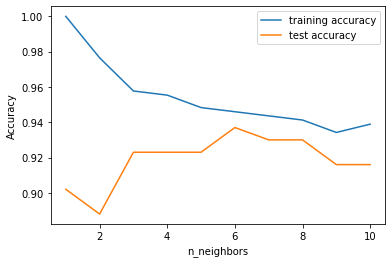

In [46]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

## Linear Models - continuous features

### Linear regression (aka Ordinary Least Squares, OLS)
### y = wx + b
### - finds parameters w and b 
### - that minimize the *mean squared error*, 
### - between predictions and the true regression targets on the training set

In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

# w, referred as weight/coefficients stored in lr.coef_ (array of features)
# b, referred as offset/intercept is stored in lr.intercept_ (singal value)
# R^2 referred as mean squared error is stored in lr.score

## Ridge Regression
 
 - Magnitude of coefficients to be as small as possible
 - w should be close to zero
 - L2 regulatization
 - L2 control by aplha (defalut =1.0), higher alpha, coefficients move more towards zero

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ridge = Ridge()

## Lasso

- L1 regularization
- some coefficients are exactly zero (.coef_ == 0)
- alpha (default 1.0)
- change alpha need to add max_iter = 100000

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [61]:
# Number of features used:
# np.sum(lasso.coef_ != 0)

- *Ridge* regression is usually the first choice between *Lasso* and *Linear regressions*.
- However, if you have a large amount of features and expect only a few of them to be important, *Lasso* might be a better choice


## Linear Regression for classificaiton 

class a: y = wx + b > 0 \
else class b

- combination of coefficients and intercept
- kinds of regularization

## Logistic Regression
## Linear Support Vector Machinese (linear SVM)

- Both L2 regularisation as default
- Strength of regularization by C. 
- Higher C less regularization, vice versa

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [76]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_train, y_train)
print(
    "Training set score: {:.3f}".format(logreg.score(X_train, y_train))
    )
print(
    "Test set score: {:.3f}".format(logreg.score(X_test, y_test))
)

Training set score: 0.958
Test set score: 0.958


0.958041958041958

## Naive Bayes classifiers
- GaussianNB - continuous data
- BernoulliNB - binary data - text data classificaiton
- MultinomiaNB - count data (how often a word appears in a sentence) - text data classificaiton

## Decision Trees
- classification and regression
- if/else questions...to a decision - referred as test
- root/leaf
- a leaft of the tree that contains data points that all share the same target value is called *pure*
- easy overfit

To prevent overfitting
- stop creation of the tree early (pre-pruning)
    - limiting max depth of the tree
    - limiiting max number of leaves
    - require min number of points in a node to keep splitting it
- remove/collaps nodes that contain little information (post-pruning)

Unpruned trees are prone to overfitting and not generalizing well to new data


In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'graphviz'

In [83]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [93]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(
    "Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)),
    "\nAccuracy on test set: {:.3f}".format(tree.score(X_test, y_test))
)


Accuracy on training set: 1.000 
Accuracy on test set: 0.937


In [94]:
tree_maxdepth = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_maxdepth.fit(X_train, y_train)

print(
    "Accuracy on training set: {:.3f}".format(tree_maxdepth.score(X_train, y_train)),
    "\nAccuracy on test set: {:.3f}".format(tree_maxdepth.score(X_test, y_test))
)

Accuracy on training set: 0.988 
Accuracy on test set: 0.951


In [101]:
export_graphviz(
    tree_maxdepth, 
    out_file="tree_maxdepth.dot",
    class_names=["malignant", "benign"], 
    feature_names=cancer.feature_names, 
    impurity=False, 
    filled=True
    )